In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

 Load Dataset

In [11]:
data_frame = pd.read_csv('BMW sales data (2010-2024).csv')

In [15]:
print("Dataset Info:")
data_frame.info()
data_frame.head()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model                 50000 non-null  object 
 1   Year                  50000 non-null  int64  
 2   Region                50000 non-null  object 
 3   Color                 50000 non-null  object 
 4   Fuel_Type             50000 non-null  object 
 5   Transmission          50000 non-null  object 
 6   Engine_Size_L         50000 non-null  float64
 7   Mileage_KM            50000 non-null  int64  
 8   Price_USD             50000 non-null  int64  
 9   Sales_Volume          50000 non-null  int64  
 10  Sales_Classification  50000 non-null  object 
dtypes: float64(1), int64(4), object(6)
memory usage: 4.2+ MB


,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Sales_Classification
0,5 Series,2016,Asia,Red,Petrol,Manual,3.5,151748,98740,8300,High
1,i8,2013,North America,Red,Hybrid,Automatic,1.6,121671,79219,3428,Low
2,5 Series,2022,North America,Blue,Petrol,Automatic,4.5,10991,113265,6994,Low
3,X3,2024,Middle East,Blue,Petrol,Automatic,1.7,27255,60971,4047,Low
4,7 Series,2020,South America,Black,Diesel,Manual,2.1,122131,49898,3080,Low


In [16]:
print(f"Shape: {data_frame.shape}")
print("\nColumns:", list(data_frame.columns))
data_frame.describe(include='all').T

Shape: (50000, 11)

Columns: ['Model', 'Year', 'Region', 'Color', 'Fuel_Type', 'Transmission', 'Engine_Size_L', 'Mileage_KM', 'Price_USD', 'Sales_Volume', 'Sales_Classification']


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Model,50000,11,7 Series,4666,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,50000.0,NaN,NaN,NaN,2017.0157,4.324459,2010.0,2013.0,2017.0,2021.0,2024.0
Region,50000,6,Asia,8454,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Color,50000,6,Red,8463,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fuel_Type,50000,4,Hybrid,12716,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Transmission,50000,2,Manual,25154,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Engine_Size_L,50000.0,NaN,NaN,NaN,3.24718,1.009078,1.5,2.4,3.2,4.1,5.0
Mileage_KM,50000.0,NaN,NaN,NaN,100307.20314,57941.509344,3.0,50178.0,100388.5,150630.25,199996.0
Price_USD,50000.0,NaN,NaN,NaN,75034.6009,25998.248882,30000.0,52434.75,75011.5,97628.25,119998.0
Sales_Volume,50000.0,NaN,NaN,NaN,5067.51468,2856.767125,100.0,2588.0,5087.0,7537.25,9999.0


Data Cleaning (Nulls, Duplicates, Formats)

In [17]:
if data_frame.isnull().values.any():
    print("Null values per column before filling:\n", data_frame.isnull().sum())
    
    for col in data_frame.select_dtypes(include='object'):
        data_frame[col].fillna("Unknown", inplace=True)
    for col in data_frame.select_dtypes(include=np.number):
        data_frame[col].fillna(data_frame[col].median(), inplace=True)

    print("\nNull values per column after filling:\n", data_frame.isnull().sum())
else:
    print("No null values found in the dataset.")

No null values found in the dataset.


In [20]:
duplicates = data_frame.duplicated().sum()
print(f"Duplicate Rows: {duplicates}")
data_frame.drop_duplicates(inplace=True)

Duplicate Rows: 0


Data Reshaping Convert data formats and create derived columns (like Revenue or Profit if applicable).

In [35]:
if {'Sales_Volume', 'Price_USD'}.issubset(data_frame.columns):
    data_frame['Revenue'] = data_frame['Sales_Volume'] * data_frame['Price_USD']
    print("'Revenue' column added successfully.")
else:
    print("Required columns not found:", data_frame.columns.tolist())


'Revenue' column added successfully.


In [45]:
if {'Revenue', 'Cost'}.issubset(data_frame.columns):
    data_frame['Profit'] = data_frame['Revenue'] - data_frame['Cost']
    print("'Profit' column added successfully.")
else:
    print("'Cost' column not found. Skipping profit calculation.")

'Cost' column not found. Skipping profit calculation.


In [46]:
data_frame.to_csv("BMW sales data (2010-2024)-Cleaned.csv", index=False)
print("File saved as 'BMW sales data (2010-2024)-Cleaned.csv'")

File saved as 'BMW sales data (2010-2024)-Cleaned.csv'


In [47]:
data_frame = pd.read_csv('BMW sales data (2010-2024)-cleaned.csv')

Trend Analysis — Sales Over the Years Analyze overall sales trends and yearly performance.

Yearly Revenue Trend

In [49]:
if 'Year' in data_frame.columns and 'Revenue' in data_frame.columns:
    yearly_sales = data_frame.groupby('Year')['Revenue'].sum().reset_index().to_string(index=False)
    print("\n----- Yearly Revenue Trend -----")
    print(yearly_sales)
else:
    print("Columns 'Year' or 'Revenue' not found in the dataset.")


----- Yearly Revenue Trend -----
 Year       Revenue
 2010 1261631480830
 2011 1258944308614
 2012 1257840248199
 2013 1258599026870
 2014 1269989867142
 2015 1255056528796
 2016 1284641854435
 2017 1251237076544
 2018 1244465589591
 2019 1289342744664
 2020 1226552860854
 2021 1272402559079
 2022 1344427738820
 2023 1224302534555
 2024 1312808115466


Top 10 Models

In [50]:
top_models = data_frame.groupby('Model')['Revenue'].sum().nlargest(10).reset_index().to_string(index=False)
print("\n----- Top 10 BMW Models by Revenue -----")
print(top_models)


----- Top 10 BMW Models by Revenue -----
   Model       Revenue
7 Series 1790070249282
3 Series 1768534028214
      i8 1764743448529
      X1 1752985285361
5 Series 1735712423092
      i3 1724197530210
      X5 1708653383772
      X3 1707951188482
      M5 1698467355916
      X6 1693423254979


Regional Sales

In [51]:
if 'Region' in data_frame.columns:
    region_sales = data_frame.groupby('Region')['Revenue'].sum().reset_index().sort_values(by='Revenue', ascending=False).to_string(index=False)
    print("\n----- Regional Revenue Distribution -----")
    print(region_sales)


----- Regional Revenue Distribution -----
       Region       Revenue
         Asia 3250635961348
       Europe 3188079573212
North America 3182938635076
  Middle East 3167783530851
South America 3113805414620
       Africa 3108999419352


Growth Rate

In [57]:
if {'Year', 'Revenue'}.issubset(data_frame.columns):
    yearly_sales = data_frame.groupby('Year', as_index=False)['Revenue'].sum()
    yearly_sales['Growth Rate (%)'] = yearly_sales['Revenue'].pct_change() * 100

    print("\n----- Annual Growth Rate (%) -----")
    print(yearly_sales[['Year', 'Growth Rate (%)']].to_string(index=False))
else:
    print("Columns 'Year' or 'Revenue' are missing in the dataset.")


----- Annual Growth Rate (%) -----
 Year  Growth Rate (%)
 2010              NaN
 2011        -0.212992
 2012        -0.087697
 2013         0.060324
 2014         0.905041
 2015        -1.175863
 2016         2.357290
 2017        -2.600318
 2018        -0.541183
 2019         3.606139
 2020        -4.869914
 2021         3.738094
 2022         5.660565
 2023        -8.935044
 2024         7.229061


Average Price Trend

In [58]:
if {'Price_USD', 'Year'}.issubset(data_frame.columns):
    avg_price = data_frame.groupby('Year', as_index=False)['Price_USD'].mean().to_string(index=False)
    print("\n----- Average Selling Price by Year -----")
    print(avg_price)
else:
    print("Required columns ('Price_USD' or 'Year') not found.")


----- Average Selling Price by Year -----
 Year    Price_USD
 2010 75072.215916
 2011 75293.276388
 2012 75019.567227
 2013 74535.908298
 2014 74556.535224
 2015 74049.552710
 2016 75543.540862
 2017 75173.147416
 2018 75455.480781
 2019 75194.426002
 2020 75057.667083
 2021 75399.277580
 2022 74967.875503
 2023 75194.004660
 2024 75025.852933


Top 10 Colors by Total Revenue

In [83]:
if 'Color' in data_frame.columns:
    color_sales = data_frame.groupby('Color')['Revenue'].sum().nlargest(10).reset_index().to_string(index=False)
    print("\n----- Top 10 Car Colors by Revenue -----")
    print(color_sales)



----- Top 10 Car Colors by Revenue -----
 Color       Revenue
   Red 3205175199705
Silver 3187790756472
 White 3187478386188
  Blue 3177753211463
  Grey 3133799363675
 Black 3120245616956


Yearly Color Preferences


In [88]:
if {'Color', 'Year'}.issubset(data_frame.columns):
    yearly_color = data_frame.groupby(['Year', 'Color'])['Revenue'].sum().reset_index().head(20).to_string(index=False)
    print("\n----- Yearly Color Sales Trend -----")
    print(yearly_color)


----- Yearly Color Sales Trend -----
 Year  Color      Revenue
 2010  Black 207847840216
 2010   Blue 197893477392
 2010   Grey 209340749019
 2010    Red 217406477779
 2010 Silver 213438332441
 2010  White 215704603983
 2011  Black 203785798859
 2011   Blue 201750591836
 2011   Grey 205567549688
 2011    Red 216566066535
 2011 Silver 214367544814
 2011  White 216906756882
 2012  Black 196646724418
 2012   Blue 207215241111
 2012   Grey 217345756132
 2012    Red 213795991997
 2012 Silver 205599605241
 2012  White 217236929300
 2013  Black 193585060330
 2013   Blue 218633570140


Average Price per Color

In [91]:
if {'Color', 'Price_USD'}.issubset(data_frame.columns):
    avg_price_color = (
        data_frame
        .groupby('Color', as_index=False)['Price_USD']
        .mean()
        .sort_values(by='Price_USD', ascending=False).to_string(index=False)
    )
    print("\n----- Average Selling Price by Color -----")
    print(avg_price_color)


----- Average Selling Price by Color -----
 Color    Price_USD
  Blue 75427.276204
 White 75410.571291
 Black 74984.900762
   Red 74896.445114
Silver 74894.073892
  Grey 74601.855414


Visualizing All Trends Below are the visualizations for the same trends printed above.

Annual Revenue Trend


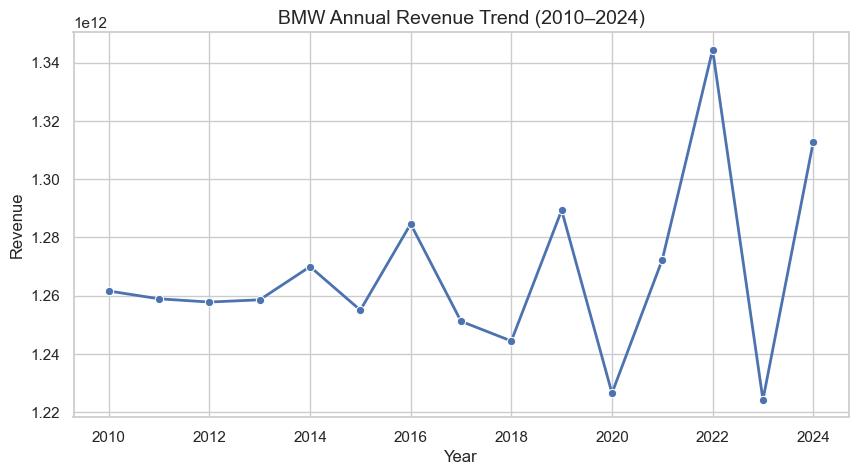

In [59]:
plt.figure(figsize=(10,5))
sns.lineplot(x='Year', y='Revenue', data=yearly_sales, marker='o', linewidth=2)
plt.title('BMW Annual Revenue Trend (2010–2024)', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Revenue')
plt.show()

Top 10 Models by Revenue

In [62]:
top_models = (
    data_frame.groupby('Model', as_index=False)['Revenue']
    .sum()
    .sort_values(by='Revenue', ascending=False)
    .head(10)
)

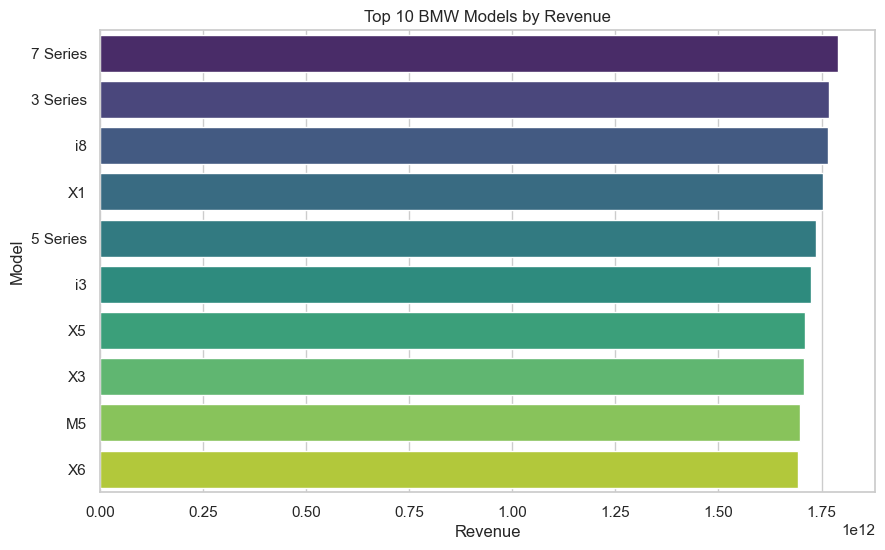

In [64]:
plt.figure(figsize=(10,6))
sns.barplot(
    x='Revenue',
    y='Model',
    data=top_models,
    hue='Model',
    palette='viridis',
    legend=False
)
plt.title('Top 10 BMW Models by Revenue')
plt.xlabel('Revenue')
plt.ylabel('Model')
plt.show()

Regional Sales

In [66]:
if {'Region', 'Revenue'}.issubset(data_frame.columns):
    region_sales = (
        data_frame.groupby('Region', as_index=False)['Revenue']
        .sum()
        .sort_values(by='Revenue', ascending=False)
    )

    print("\n----- Revenue by Region -----")
    print(region_sales)



----- Revenue by Region -----
          Region        Revenue
1           Asia  3250635961348
2         Europe  3188079573212
4  North America  3182938635076
3    Middle East  3167783530851
5  South America  3113805414620
0         Africa  3108999419352


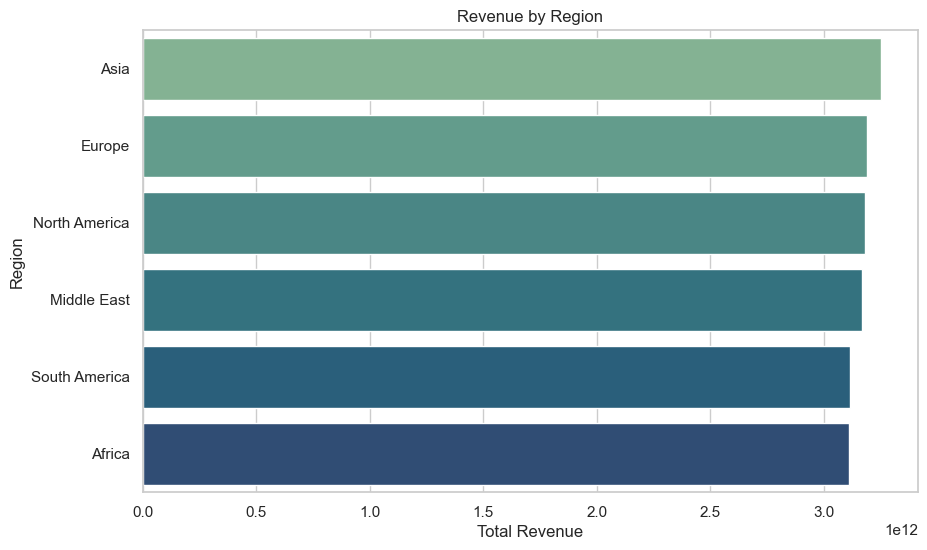

In [68]:
if 'Region' in data_frame.columns:
    plt.figure(figsize=(10,6))
    sns.barplot(
    x='Revenue',
    y='Region',
    data=region_sales,
    hue='Region',
    palette='crest',
    legend=False
)
    plt.title('Revenue by Region')
    plt.xlabel('Total Revenue')
    plt.ylabel('Region')
    plt.show()

Annual Growth Rate

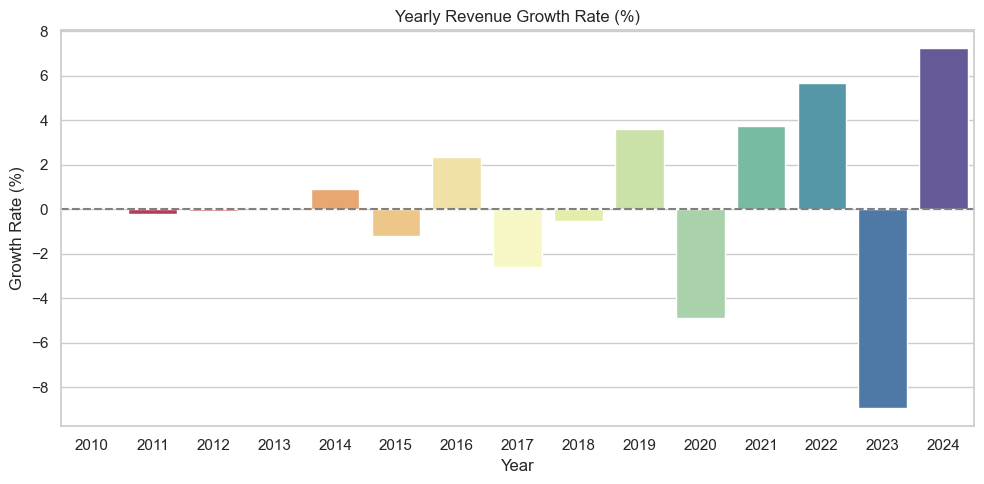

In [75]:
plt.figure(figsize=(10,5))
sns.barplot(
    x='Year',
    y='Growth Rate (%)',
    hue='Year',              
    data=yearly_sales,
    palette='Spectral',
    legend=False
)
plt.title('Yearly Revenue Growth Rate (%)')
plt.xlabel('Year')
plt.ylabel('Growth Rate (%)')
plt.axhline(0, color='gray', linestyle='--')
plt.tight_layout()
plt.show()


Average Selling Price (ASP)

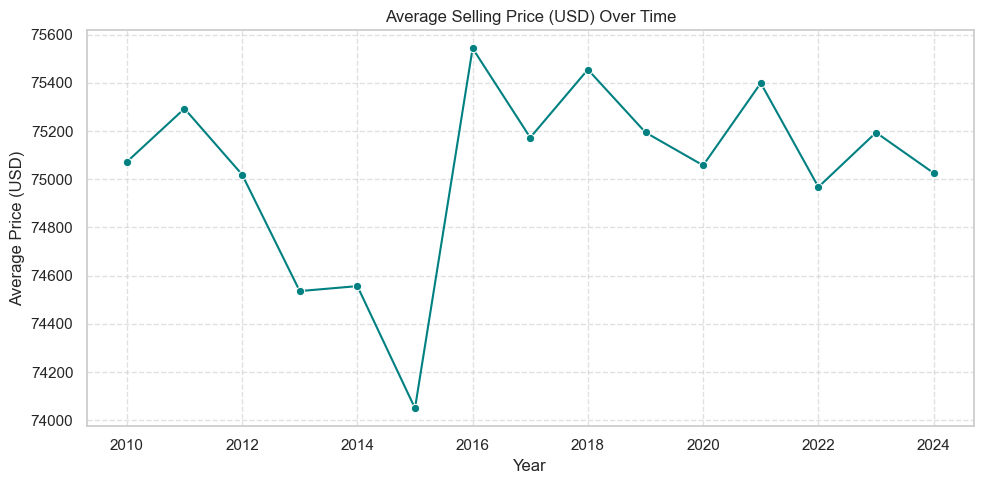

In [80]:
if {'Price_USD', 'Year'}.issubset(data_frame.columns):
    avg_price = data_frame.groupby('Year', as_index=False)['Price_USD'].mean()

    plt.figure(figsize=(10,5))
    sns.lineplot(x='Year', y='Price_USD', data=avg_price, marker='o', color='teal')
    plt.title('Average Selling Price (USD) Over Time')
    plt.xlabel('Year')
    plt.ylabel('Average Price (USD)')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

Correlation Heatmap

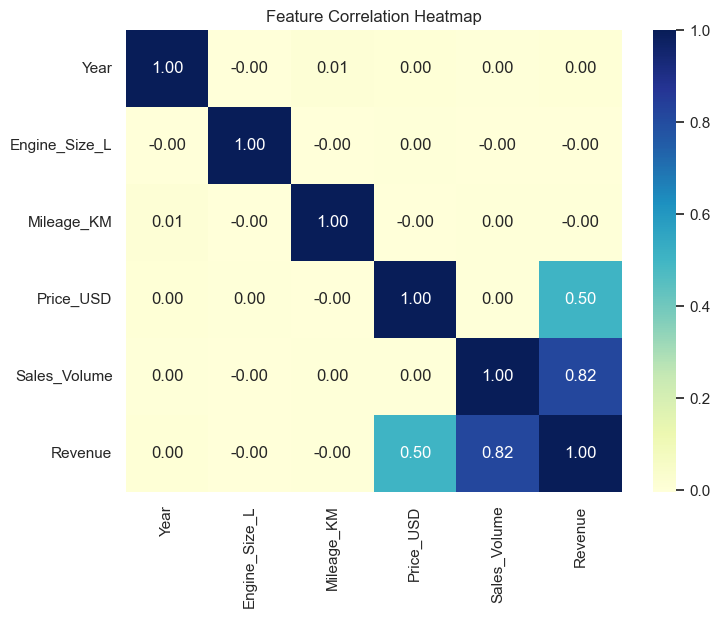

In [81]:
plt.figure(figsize=(8,6))
sns.heatmap(data_frame.corr(numeric_only=True), annot=True, cmap='YlGnBu', fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.show()

Top Colors by Revenue

In [93]:
if {'Color', 'Revenue'}.issubset(data_frame.columns):
    color_sales = (
        data_frame
        .groupby('Color', as_index=False)['Revenue']
        .sum()
        .sort_values(by='Revenue', ascending=False)
        .head(10)
    )

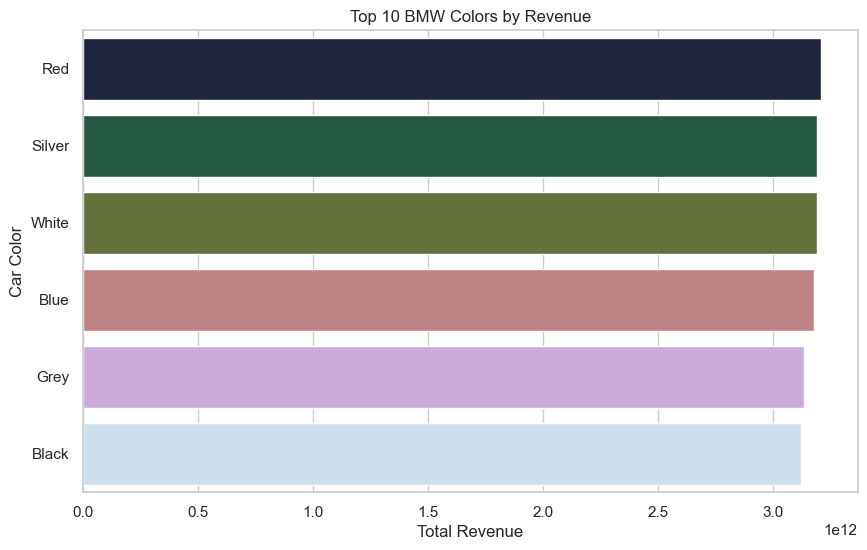

In [94]:
if 'Color' in data_frame.columns:
    plt.figure(figsize=(10,6))
    sns.barplot(
        x='Revenue',
        y='Color',
        data=color_sales,
        hue='Color',
        palette='cubehelix',
        legend=False
    )
    plt.title('Top 10 BMW Colors by Revenue')
    plt.xlabel('Total Revenue')
    plt.ylabel('Car Color')
    plt.show()

Yearly Sales Trend by Color (Top 5 colors only)

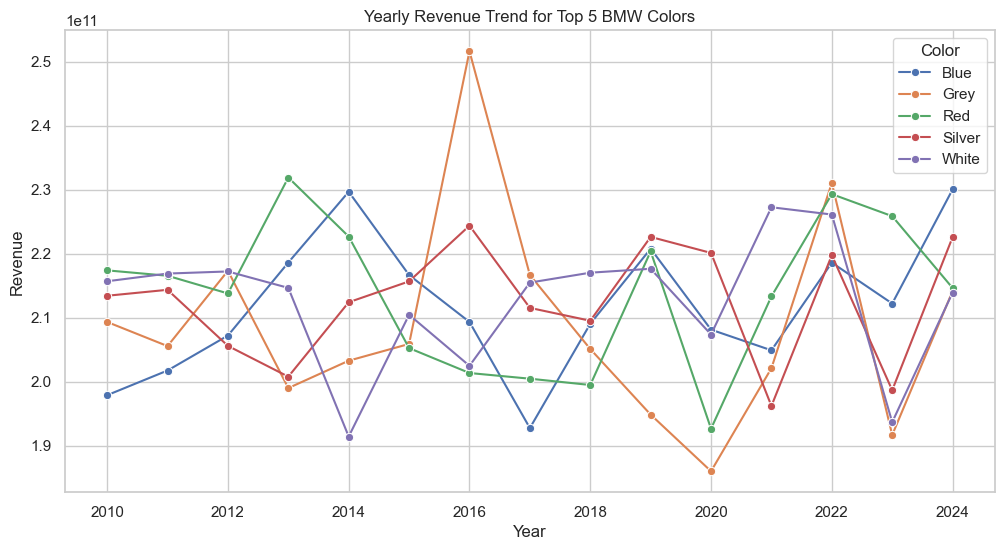

In [96]:
if {'Color', 'Year', 'Revenue'}.issubset(data_frame.columns):
    color_sales = (
        data_frame.groupby('Color')['Revenue']
        .sum()
        .nlargest(10)
        .reset_index()
    )

    yearly_color = (
        data_frame.groupby(['Year', 'Color'])['Revenue']
        .sum()
        .reset_index()
    )

    top5_colors = color_sales['Color'].head(5).tolist()

    color_year_trend = yearly_color[yearly_color['Color'].isin(top5_colors)]

    plt.figure(figsize=(12, 6))
    sns.lineplot(
        x='Year',
        y='Revenue',
        hue='Color',
        data=color_year_trend,
        marker='o'
    )
    plt.title('Yearly Revenue Trend for Top 5 BMW Colors')
    plt.xlabel('Year')
    plt.ylabel('Revenue')
    plt.legend(title='Color')
    plt.show()

Average Price by Color

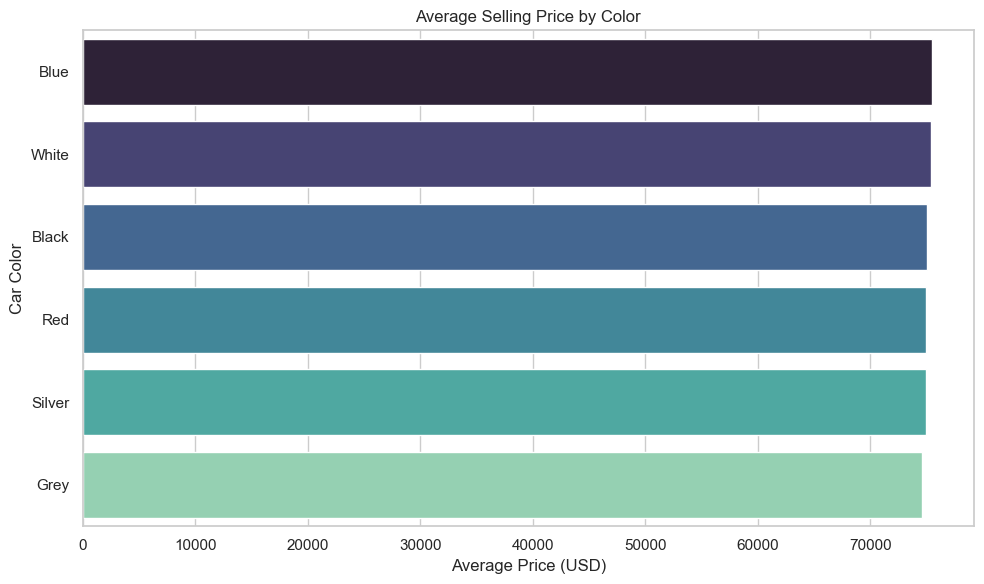

In [ ]:
if {'Color', 'Price_USD'}.issubset(data_frame.columns):
    avg_price_color = (
        data_frame.groupby('Color', as_index=False)['Price_USD']
        .mean()
        .sort_values(by='Price_USD', ascending=False)
    )

    plt.figure(figsize=(10,6))
    sns.barplot(
        x='Price_USD',
        y='Color',
        data=avg_price_color,
        hue='Color',
        palette='mako',
        legend=False
    )
    plt.title('Average Selling Price by Color')
    plt.xlabel('Average Price (USD)')
    plt.ylabel('Car Color')
    plt.tight_layout()
    plt.show()
